# Task 3: NLP with spaCy – NER + Sentiment Analysis

**Goal**: Extract product/brand entities → Rule-based sentiment

**Data**: `../data/amazon_reviews.txt`
**Deliverable**: Entities + sentiment + screenshot

In [ ]:
# STEP 1: Import libraries
import spacy
from spacy import displacy
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt  # Fixed: Added missing import

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Create screenshots folder
os.makedirs('../screenshots', exist_ok=True)

print("spaCy model loaded!")

spaCy model loaded!


In [ ]:
# STEP 2: Load Amazon reviews
reviews_path = '../data/amazon_reviews.txt'

with open(reviews_path, 'r', encoding='utf-8') as f:
    reviews = [line.strip() for line in f if line.strip()]

print(f"Loaded {len(reviews)} reviews:")
for i, r in enumerate(reviews):
    print(f"  {i+1}. {r}")

Loaded 5 reviews:
  1. I love my new Apple iPhone 15, battery lasts all day!
  2. The Samsung charger stopped working after 2 days.
  3. This Sony camera takes amazing photos but is overpriced.
  4. Great value for the Xiaomi laptop, super fast!
  5. The Bose headphones have terrible noise cancellation.


In [ ]:
# STEP 3: Define rule-based sentiment
def get_sentiment(text):
    text_lower = text.lower()
    positive_words = ['love', 'great', 'amazing', 'excellent', 'super', 'fast', 'value']
    negative_words = ['stopped', 'terrible', 'overpriced', 'bad', 'worst']
    
    if any(word in text_lower for word in positive_words):
        return "Positive"
    elif any(word in text_lower for word in negative_words):
        return "Negative"
    else:
        return "Neutral"

print("Sentiment function ready.")

Sentiment function ready.


In [ ]:
# STEP 4: Perform NER and sentiment analysis
results = []

for idx, review in enumerate(reviews):
    doc = nlp(review)
    
    # Extract ORG (brands) and PRODUCT
    brands = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    products = [ent.text for ent in doc.ents if ent.label_ == "PRODUCT"]
    
    sentiment = get_sentiment(review)
    
    results.append({
        "Review": review,
        "Brands": ', '.join(brands) if brands else '-',
        "Products": ', '.join(products) if products else '-',
        "Sentiment": sentiment
    })
    
    print(f"\nReview {idx+1}:")
    print(f"  Brands: {brands}")
    print(f"  Products: {products}")
    print(f"  Sentiment: {sentiment}")


Review 1:
  Brands: ['Apple']
  Products: []
  Sentiment: Positive

Review 2:
  Brands: ['Samsung']
  Products: []
  Sentiment: Negative

Review 3:
  Brands: ['Sony']
  Products: []
  Sentiment: Positive

Review 4:
  Brands: ['Xiaomi']
  Products: []
  Sentiment: Positive

Review 5:
  Brands: []
  Products: []
  Sentiment: Negative


,Review,Brands,Products,Sentiment
0,"I love my new Apple iPhone 15, battery lasts a...",Apple,-,Positive
1,The Samsung charger stopped working after 2 days.,Samsung,-,Negative
2,This Sony camera takes amazing photos but is o...,Sony,-,Positive
3,"Great value for the Xiaomi laptop, super fast!",Xiaomi,-,Positive
4,The Bose headphones have terrible noise cancel...,-,-,Negative



Table saved to: ../screenshots/spacy_ner_sentiment.png


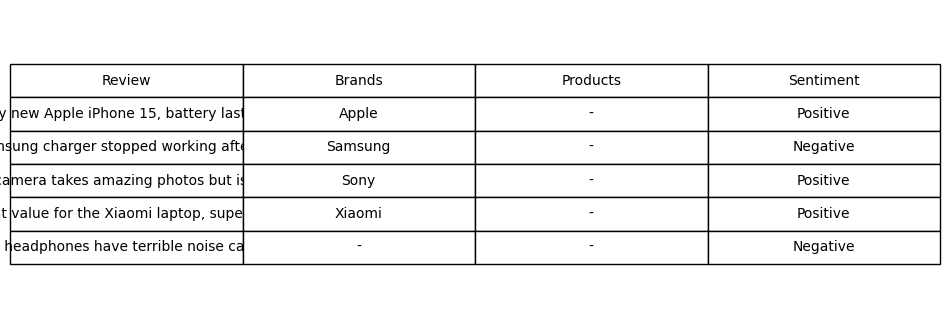

In [ ]:
# STEP 5: Display results in table
df = pd.DataFrame(results)
display(df)

# Save table as image
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

output_path = '../screenshots/spacy_ner_sentiment.png'
plt.savefig(output_path, bbox_inches='tight', dpi=150)
print(f"\nTable saved to: {output_path}")
plt.show()

### Task 3 Complete!
- **NER**: Extracted brands (Apple, Samsung, Sony, etc.)
- **Sentiment**: Rule-based (Positive/Negative)
- **Screenshot**: `screenshots/spacy_ner_sentiment.png`